# Perceptron

The Perceptron algorithm is a supervised classification algorithm invented by Frank Rosenblatt (1957) for binary classification problems (two classes).

The principle of this algorithm consists in finding a linear classifier on a training set where the inputs and the outputs y are 2 integers (-1 and 1).

The Perceptron is a single layer neural network.

## Defining the Perceptron class

First, we'll import NumPy, a useful library for Python, designed to manipulate matrices or multidimensional arrays as well as mathematical functions operating on these arrays.

In [1]:
import numpy as np

Next, we'll define the Perceptron class.

In [2]:
class Perceptron:
    # Constructor used to initialize the attributes of the Perceptron class
    def __init__(self, dimension, max_iter, learning_rate):
        self.dimension = dimension # Size of the layer / number of neurons
        self.max_iter = max_iter # Number of iterations before stopping the learning
        self.learning_rate = learning_rate # Control the rate at which the algorithm learn i.e. the rate at which the weights are updated
        self.w = np.zeros(dimension) # Initialize weights of the neurons
        self.w0 = 0 # Initialize the constant weight
    # Method used to train the model i.e. to update the weights of the Perceptron
    def fit(self, X, y):
        for _ in range(self.max_iter):
            i = np.random.randint(len(X)) # Select a random element from the input sample
            if (np.dot(self.w, X[i]) + self.w0) * y[i] <= 0: # Update the weights when predicted class differs from the ground truth one
                self.w += self.learning_rate * y[i] * X[i]
                self.w0 += self.learning_rate * y[i]
    # Method used to predict the classes of a sample of vectors x
    def predict(self, x):
        y_pred = np.zeros(len(x))
        for i in range(len(x)):
            if np.dot(self.w, x[i]) + self.w0 > 0:
                y_pred[i] = 1
            else:
                y_pred[i] = -1
        return y_pred

## Using the Perceptron on some data

### Visualizing the data

First, we'll import Pandas and Matplotlib, designed to manipulate, analyze and visualize data.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

Then, we'll import the data.
It's one of the best known datasets in Machine Learning litterature. Here are some caracteristics of this dataset:
- 150 samples with 4 numerical attributes
- 3 balanced classes (50 samples for each class)
- no missing, duplicate or invalid data

In [4]:
data = pd.read_csv("iris.csv")
data

,sepal.length,sepal_width,petal_length,petal_width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


For this example, we'll only select the first 100 lines (corresponding to the first 2 classes, for binary classification) and the columns 0 and 2 (corresponding to the lengths of the sepals and the petals).
We could have used more than 2 attributes but we chose to use only 2 for a better visualisation of the method.

In [5]:
X_data = data.iloc[0:100, [0, 2]].values # Select X input
y_data = data.iloc[0:100, 4].values # Select y output
y_data = np.where(y_data == "Setosa", -1, 1) # Transform labels to integer values (-1 or 1)

Now, we'll visualize the data on a graph.

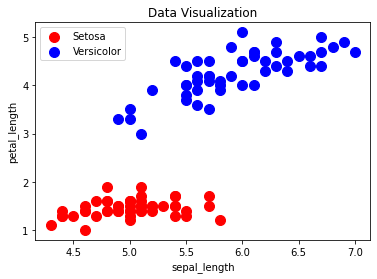

In [6]:
plt.scatter(X_data[:50, 0], X_data[:50, 1], c = 'red', s = 100, label = 'Setosa')
plt.scatter(X_data[50:, 0], X_data[50:, 1], c = 'blue', s = 100, label = 'Versicolor')
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.title('Data Visualization')
plt.legend()
plt.show()

### Train the model

We'll import the random library to split randomly the data in two sub-datasets, the training datasets and the test datasets.

In [7]:
import random

training_sample = random.sample(range(100), 70)
test_sample = [x for x in range(100) if x not in training_sample]

Then it's time to train our Perceptron and make some predictions.

In [8]:
perceptron = Perceptron(dimension = 2, max_iter = 100, learning_rate = 0.1) # Initialize our model
perceptron.fit(X_data[training_sample], y_data[training_sample]) # Train our model

y_pred = perceptron.predict(X_data[test_sample]) # Predict classes with our model

Now, we'll visualize the predicted labels and the linear classifier of our model on a graph.

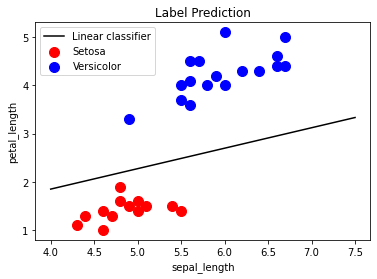

In [9]:
setosa_sample = X_data[test_sample][y_pred < 0]
versicolor_sample = X_data[test_sample][y_pred > 0]
plt.scatter(setosa_sample[:, 0], setosa_sample[:, 1], c = 'red', s = 100, label = 'Setosa')
plt.scatter(versicolor_sample[:, 0], versicolor_sample[:, 1], c = 'blue', s = 100, label = 'Versicolor')
plt.plot([4, 7.5], [(-4*perceptron.w[0] - perceptron.w0) / perceptron.w[1],
                    (-7.5*perceptron.w[0] - perceptron.w0) / perceptron.w[1]],
                    c = 'black', label = 'Linear classifier')
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.title('Label Prediction')
plt.legend()
plt.show()